# Finding the Hollywood Formula, Movie Dataset Analysis

### Project Goal: 

What is the movie formula? A statistical analysis approach  to predicting successful movie.

### Stakeholders: 
Movie directors and general public

#### Get all import libraries

In [30]:
from libraries import*

# Planning 
See planning section of the final_report.py
https://github.com/Movie-Success-Capstone/Movie-Capstone/blob/main/Final/final_report.ipynb

# Data Acquisition

In [31]:
# Call the acquire function & cache the files locally
df = wrangle_df()

Using cached CSV


# Data Preparation

The parent module for both data acquisition and preparation are included in the final)acquire module. Within the same module file, specific tasts are divided by individualized function to better enhance readability. Wrangle_df function is the resultant that collectively hosts calls to the main prep_data function function for the our data preparation. This function uses local data caching method to enhance data loading speeds.

##### Prep_data function
Drops unnecessary columns

Drops individual row nulls and any duplicated values

Applies median budget values for budget between 0 to 1,000,000

Appends names(with whitespace) on genres columns

Returns profitable as type bool for explorations

Extracts nested dictionary data from columns production_company and cast

One hot ecode data for modeling

Feature engineer columns:

Release_year
Release_date
Profitable
Success
Profit_amount {revenue - budget}
Success_rating {(revenue / budget) * 2] * vote_average}
Sets dataframe index as id

Saved a clean.csv file for explorations.

Explain variables as defined in the project through graphical data dictionary representation

Train_validate_test_split function
Splits the dataset into train, validate, and test sets for exploration and modeling.




In [32]:
# Check for overall nulls

df.isna().sum()

title                   0
success                 0
success_rating          0
genres                  2
cast_actor_1            0
cast_actor_2            0
cast_actor_3            0
total_n_cast            0
budget                  0
revenue                 0
profit_amount           0
vote_average            0
vote_count              0
production_companies    0
production_countries    0
overview                0
popularity              0
runtime                 0
profitable              0
release_date            0
imdb_id                 0
production_company      0
is_genre_adventure      0
is_genre_horror         0
is_genre_drama          0
is_genre_scifi          0
is_genre_romance        0
is_genre_thriller       0
is_genre_crime          0
is_genre_comedy         0
is_genre_animation      0
is_genre_action         0
is_genre_mystery        0
is_genre_fantasy        0
is_genre_documentary    0
release_year            0
release_month           0
release_day             0
release_week

In [33]:
# Nulls by cols 

nulls_by_col(df)

,percent_cols_missing,id
num_cols_missing,,
1,2.3255813953488373,2
0,0.0,6891


In [34]:
# Nulls by rows 

nulls_by_row(df)

,num_rows_missing,percent_rows_missing
genres,2.0,0.0
title,0.0,0.0
is_genre_mystery,0.0,0.0
is_genre_drama,0.0,0.0
is_genre_scifi,0.0,0.0
is_genre_romance,0.0,0.0
is_genre_thriller,0.0,0.0
is_genre_crime,0.0,0.0
is_genre_comedy,0.0,0.0
is_genre_animation,0.0,0.0


In [35]:
# Examine the nulls in the genres columns

df.genres.isna().value_counts()

False    6891
True        2
Name: genres, dtype: int64

In [36]:
# Drop the 2 rows missing values in the genres column

df = df.dropna(subset=['genres'])

In [37]:
# Examine the nulls again in the genres columns

df.genres.isna().value_counts()

False    6891
Name: genres, dtype: int64

In [38]:
# Dataframe display

df.head(3)

,title,success,success_rating,genres,cast_actor_1,cast_actor_2,cast_actor_3,total_n_cast,budget,revenue,profit_amount,vote_average,vote_count,production_companies,production_countries,overview,popularity,runtime,profitable,release_date,imdb_id,production_company,is_genre_adventure,is_genre_horror,is_genre_drama,is_genre_scifi,is_genre_romance,is_genre_thriller,is_genre_crime,is_genre_comedy,is_genre_animation,is_genre_action,is_genre_mystery,is_genre_fantasy,is_genre_documentary,release_year,release_month,release_day,release_weekday,is_long_movie,ROI,returns,budget_range
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,Four Rooms,0,3.493750,Crime Comedy,Tim Roth,Antonio Banderas,Jennifer Beals,24.0,4000000.0,4300000.0,300000.0,6.5,539.0,MiramaxFilms ABandApart,UnitedStatesofAmerica,It's Ted the Bellhop'...,9.026586,98.0,0,1995-12-09,tt0113101,MiramaxFilms,0,0,0,0,0,0,1,1,0,0,0,0,0,1995,12,9,Saturday,0,1.075000,avg,low
6,Judgment Night,0,3.883820,Action Thriller Crime,Emilio Estevez,Cuba Gooding Jr.,Denis Leary,15.0,10000000.0,12136938.0,2136938.0,6.4,79.0,UniversalPictures Lar...,Japan UnitedStatesofA...,While racing to a box...,5.538671,110.0,0,1993-10-15,tt0107286,UniversalPictures,0,0,0,0,0,1,1,0,0,1,0,0,0,1993,10,15,Friday,0,1.213694,avg,low
11,Star Wars,1,285.487448,Adventure Action Scie...,Mark Hamill,Harrison Ford,Carrie Fisher,106.0,11000000.0,775398007.0,764398007.0,8.1,6778.0,Lucasfilm TwentiethCe...,UnitedStatesofAmerica,Princess Leia is capt...,42.149697,121.0,1,1977-05-25,tt0076759,Lucasfilm,1,0,0,1,0,0,0,0,0,1,0,0,0,1977,5,25,Wednesday,1,70.490728,very high,avg


In [39]:
# Get the population dataframe shape
df.shape

(6891, 43)

In [40]:
# Set release_date columns to date time formart before splitting
df['release_date'] = pd.to_datetime(df['release_date'])

### Split the data into train, validate, test

In [41]:
# Spit dataframe into train, validate & test

train, validate, test = train_validate_test_split(df)
train.shape, validate.shape, test.shape

((3858, 43), (1654, 43), (1379, 43))

## Explore

With the project goal in consideration, the project asks the following initial questions to guide our understanding of the features and their correlations. 

### Initial Questions:
- 1. Is there a relationship between budget and profit?
- 2. What are the top 5 highest voted movies?
- 3. Top 5 Movies with the largest return on investment(ROI)?
- 4. Which top 5 genres have the lease return on investment(ROI)?
- 5. Are there production studios that are more likely to succeed than others?
- 6. What are the drivers for less successive movies categories?
- 7. Is there a correlations between runtime for successful movies vs unsuccessful movies
- 8. Are long movies (runtime > 120 min) likely to have more success than short movies 
- 9. Which release months, days are movies likely to be successful?
- 10. Is there a relationship of profit amount with release month and day of the week?
 

In [42]:
# Set visualizations default colors

bar_color = 'chocolate'
background_color = 'bar_color'

> ## (a). Univariate Exploration

In [43]:
# Target variable mean

print(f'Overall success mean {(train.success.mean()) * 100}')

Overall success mean 38.25816485225506


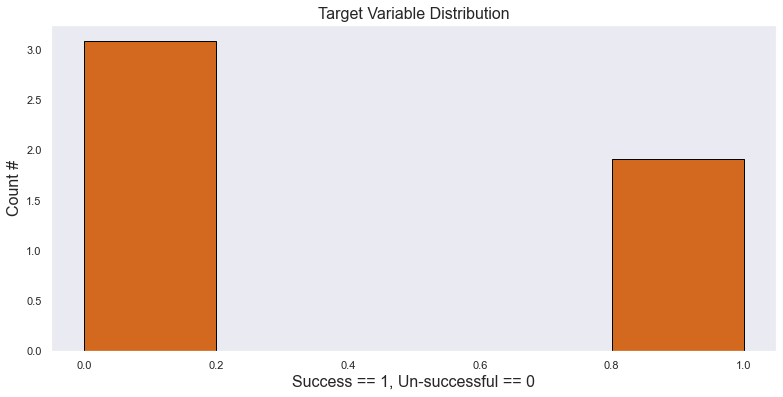

In [44]:
# Target variable 

train.success.hist(grid = False, 
                   cumulative= False, 
                   edgecolor = 'black', 
                   fill = True,
                   density=True, 
                   bins = 5,
                   facecolor = bar_color)
plt.title('Target Variable Distribution', size = 16)
plt.xlabel('Success == 1, Un-successful == 0', size = 16)
plt.ylabel('Count #', size = 16)
plt.show()


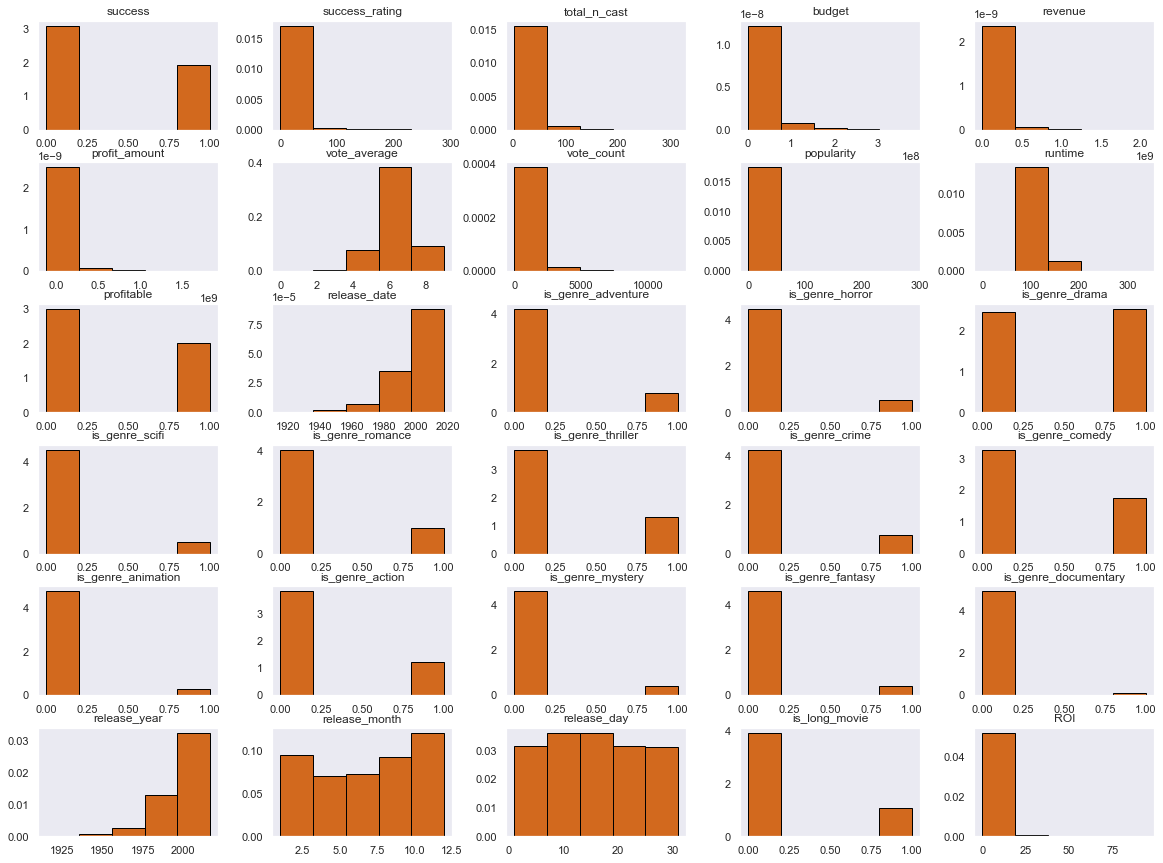

In [45]:
# Other univariate features

train.hist(figsize = (20, 15), grid = False, 
                   cumulative= False, 
                   edgecolor = 'black', 
                   fill = True,
                   density=True, 
                   bins = 5,
                   facecolor = bar_color)
plt.show()

In [46]:
# Mean average for all successful movies

success_movies_subset = train[train.success == 1]
success_movies_subset.mean()

success                 1.000000e+00
success_rating          2.109804e+01
total_n_cast            2.701626e+01
budget                  3.289935e+07
revenue                 1.488686e+08
profit_amount           1.159692e+08
vote_average            6.565176e+00
vote_count              1.115650e+03
popularity              1.203245e+01
runtime                 1.126287e+02
profitable              9.769648e-01
is_genre_adventure      1.937669e-01
is_genre_horror         1.050136e-01
is_genre_drama          4.586721e-01
is_genre_scifi          1.023035e-01
is_genre_romance        2.032520e-01
is_genre_thriller       2.682927e-01
is_genre_crime          1.578591e-01
is_genre_comedy         3.617886e-01
is_genre_animation      6.571816e-02
is_genre_action         2.608401e-01
is_genre_mystery        7.791328e-02
is_genre_fantasy        9.620596e-02
is_genre_documentary    7.452575e-03
release_year            1.997721e+03
release_month           7.117209e+00
release_day             1.588550e+01
i

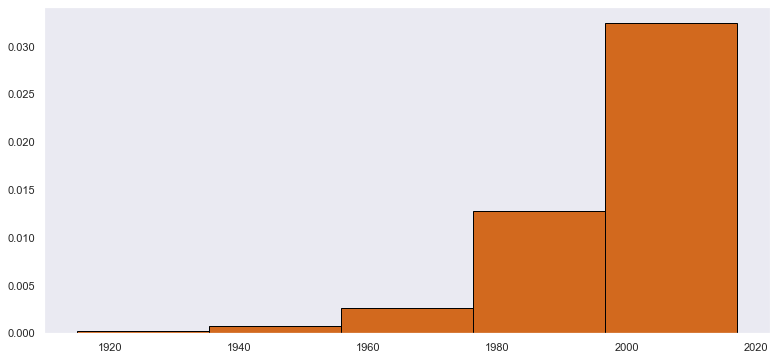

In [47]:
# Overall successful movies overtime

train.release_year.hist(grid = False, 
                   cumulative= False, 
                   edgecolor = 'black', 
                   fill = True,
                   density = True, 
                   bins = 5,
                   facecolor = bar_color)
plt.show()

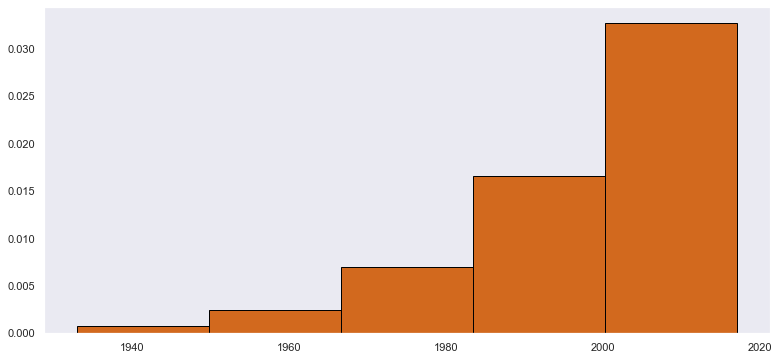

In [48]:
# Successful movies by year

success_movies_subset.release_year.hist(grid = False, 
                   cumulative= False, 
                   edgecolor = 'black', 
                   fill = True,
                   density=True, 
                   bins = 5,
                   facecolor = bar_color)
plt.show()

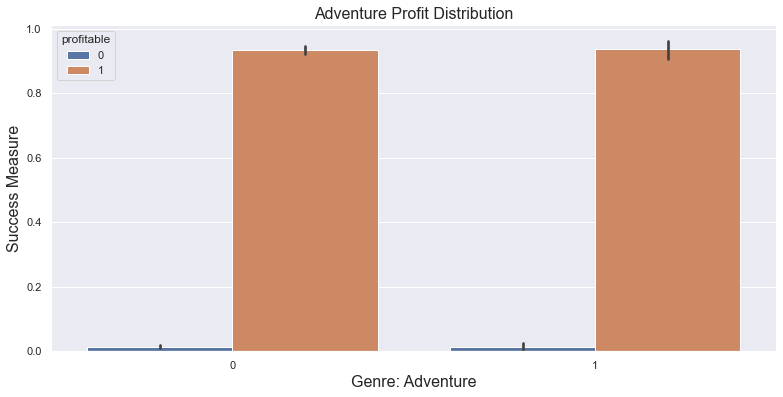

In [49]:
# Profits by adventure genre

ax = sns.barplot(x="is_genre_adventure", 
                     y = 'success', 
                     data=train, 
                     hue = 'profitable')
plt.title('Adventure Profit Distribution', size = 16)
plt.xlabel('Genre: Adventure', size = 16)
plt.ylabel('Success Measure', size = 16)
plt.show()

In [50]:
# Create list of genres

genres_list = ['is_genre_adventure',
              'is_genre_horror',
               'is_genre_drama',
               'is_genre_scifi',
               'is_genre_romance',
               'is_genre_thriller',
               'is_genre_crime',
               'is_genre_comedy',
               'is_genre_animation',
               'is_genre_action',
               'is_genre_mystery',
               'is_genre_fantasy',
               'is_genre_documentary']

### Univariate takeaways

- 38.9% of movies in the dataset succeeded and 61.1% less likely to succeed
- Vote average and runtime appears normally distributed

> ## (b). Bi-variate Exploration

### 1.  Is there a relationship between budget and profit?


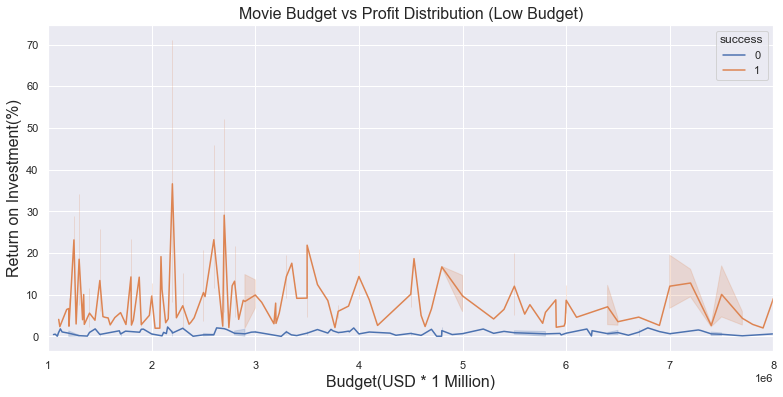

In [51]:
# Budget vs profit relationship

ax = sns.lineplot(data = train, 
                x = 'budget', 
                y = 'ROI', 
                hue='success')
plt.title('Movie Budget vs Profit Distribution (Low Budget)', size = 16)
plt.xlabel('Budget(USD * 1 Million)', size = 16)
plt.ylabel('Return on Investment(%)', size = 16)
plt.xlim(1_000_000, 8_000_000)
plt.show()

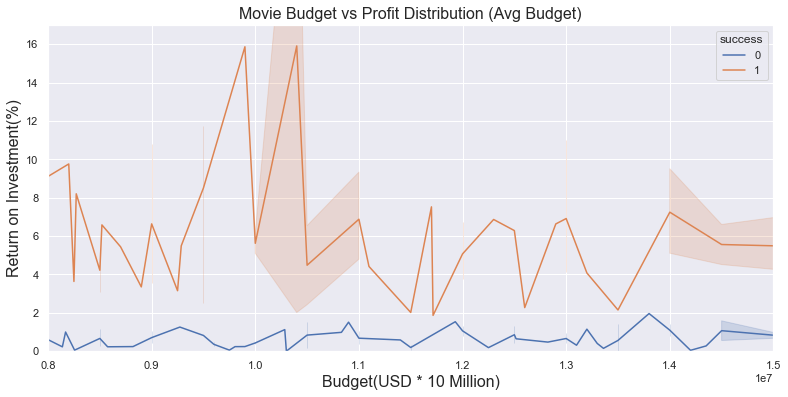

In [52]:
# Budget vs profit relationship

ax = sns.lineplot(data = train, 
                x = 'budget', 
                y = 'ROI', 
                hue='success')
plt.title('Movie Budget vs Profit Distribution (Avg Budget)', size = 16)
plt.xlabel('Budget(USD * 10 Million)', size = 16)
plt.ylabel('Return on Investment(%)', size = 16)
plt.ylim(0,17 )
plt.xlim(8_000_000, 15_000_000)
plt.show()

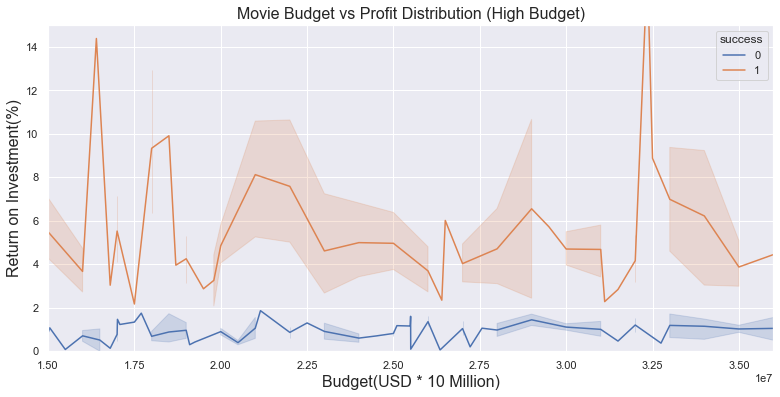

In [53]:
# Budget vs profit relationship

ax = sns.lineplot(data = train, 
                x = 'budget', 
                y = 'ROI', 
                hue='success')
plt.title('Movie Budget vs Profit Distribution (High Budget)', size = 16)
plt.xlabel('Budget(USD * 10 Million)', size = 16)
plt.ylabel('Return on Investment(%)', size = 16)
plt.ylim(0,15 )
plt.xlim(15_000_000, 36_000_000)
plt.show()

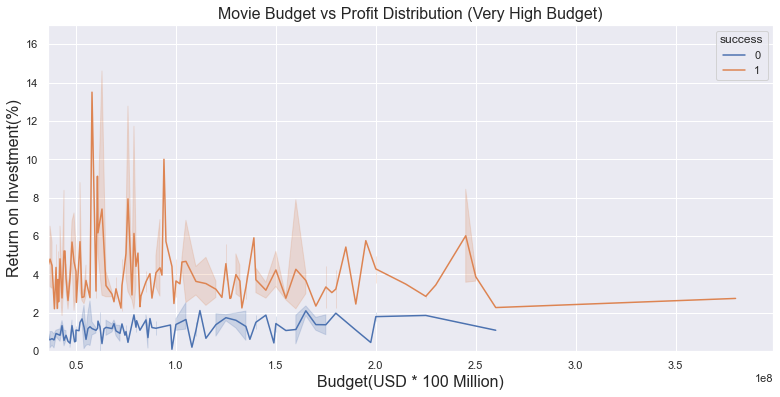

In [54]:
# Budget vs profit relationship

ax = sns.lineplot(data = train, 
                x = 'budget', 
                y = 'ROI', 
                hue='success')
plt.title('Movie Budget vs Profit Distribution (Very High Budget)', size = 16)
plt.xlabel('Budget(USD * 100 Million)', size = 16)
plt.ylabel('Return on Investment(%)', size = 16)
plt.ylim(0,17 )
plt.xlim(36_000_000, )
plt.show()

__Interpretation:__ For movies with budget slightly above 3 million, return on investment appears  

### 2. What are the top 5 highest voted movies?

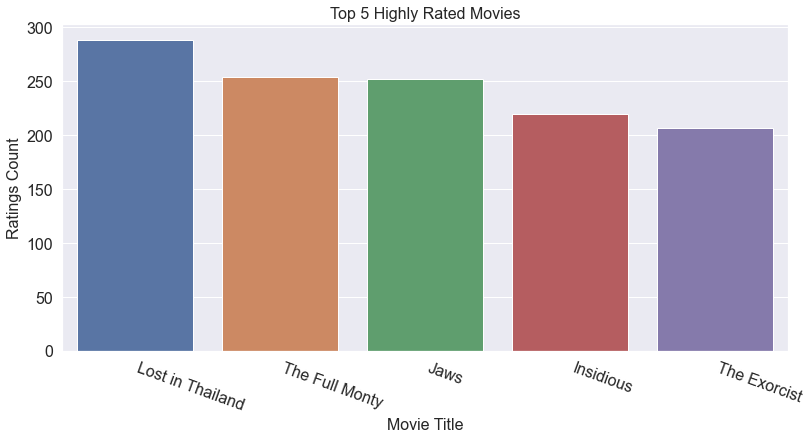

In [55]:
# 5 Highly rated movies
cols = ['title', 'success_rating']
movie_ratings_df = train.sort_values('success_rating', ascending = False)[cols].set_index('title')

# Create top five movies objects
top_5_rated_movies = movie_ratings_df.head(5)

# Plot the plots 
sns.barplot(data = top_5_rated_movies, x = top_5_rated_movies.index, y = 'success_rating');
plt.xticks(ha = 'left', rotation = -20, fontsize = 16); plt.yticks(fontsize = 16)
plt.title('Top 5 Highly Rated Movies', fontsize = 16)
plt.ylabel('Ratings Count', size = 16)
plt.xlabel('Movie Title', size = 16)
plt.show()

__Interpretation:__ Highly rated movie is the Alice in the Wonderland. This is received almost twice the ratings amount than the fifth movie

### 3. What are the least 5 rated movies?

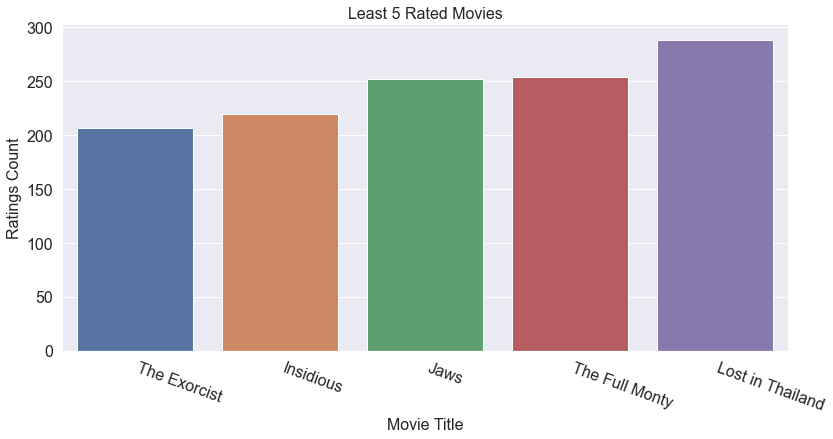

In [136]:
# Bottom 5 least voted movies
cols = ['title', 'success_rating']
movie_ratings_df = train.sort_values('success_rating', ascending = True)[cols].set_index('title')

# Create bottom 5 object
bottom_5 = movie_ratings_df.tail(5)

# Plot the visuals 
sns.barplot(data = bottom_5, 
                x = bottom_5.index, 
                y = 'success_rating');

plt.xticks(ha = 'left', rotation = -20, fontsize = 16); plt.yticks(fontsize = 16)
plt.title('Least 5 Rated Movies', fontsize = 16)
plt.ylabel('Ratings Count', size = 16)
plt.xlabel('Movie Title', size = 16)
plt.show()

__Interpretation:__ Overall, least rated movie is the "Teddy Bear's Picnic"

### 4. Top 5 Movies with the largest Return On Investment(ROI)?


Return on investment (ROI) is a business-focused interpretation for movie financial gain over the initial monetary investment.  In this dataset, ROI is calculated by:

`ROI = (df.revenue - df.budget)`

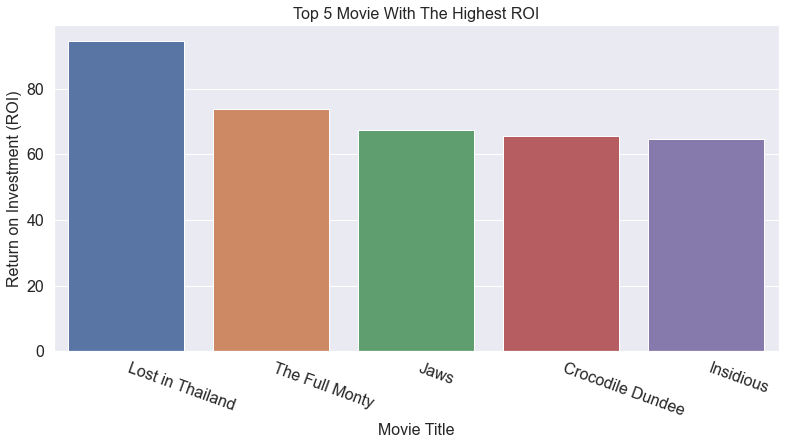

In [150]:
# Top 5 least profitable movies
cols = ['title', 'ROI']

revenue_df = train.sort_values('ROI', ascending = False)[cols].set_index('title')

# Create top 5 movies subsets
top_5 = revenue_df.head(5)

# Plot the visuals 
sns.barplot(data = top_5, x = top_5.index, y = 'ROI');
plt.xticks(ha = 'left', rotation = -20, fontsize = 16); plt.yticks(fontsize = 16)
plt.title('Top 5 Movie With The Highest ROI', fontsize = 16)
plt.ylabel('Return on Investment (ROI)', size = 16)
plt.xlabel('Movie Title', size = 16)
plt.show()

> What characteristics do successful movies have?

In [167]:
# ROI success

train.groupby('success')['ROI'].mean()

success
0    0.708630
1    6.337779
Name: ROI, dtype: float64

In [169]:
# Return on investments for top performing movies

lost_in_thailand = train[train.title == 'Lost in Thailand']
the_full_monty = train[train.title == 'The Full Monty']
jaws = train[train.title == 'Jaws']
crocodile_dundee = train[train.title == 'Crocodile Dundee']
insidious = train[train.title == 'Insidious']

print('--------Return on Investment---------\n')
print(f'Lost in Thailand: {lost_in_thailand.ROI}\n---------')
print(f': The Full Misty: {the_full_monty.ROI}\n---------')
print(f'Jaws: {jaws.ROI}\n---------')
print(f'Crocodile Dundee: {crocodile_dundee.ROI}\n---------')
print(f'Insidious: {insidious.ROI}')
print('-----------------------')

None

--------Return on Investment---------

Lost in Thailand: id
151743    94.545455
Name: ROI, dtype: float64
---------
: The Full Misty: id
9427    73.671463
Name: ROI, dtype: float64
---------
Jaws: id
578    67.236286
Name: ROI, dtype: float64
---------
Crocodile Dundee: id
9671    65.640701
Name: ROI, dtype: float64
---------
Insidious: id
49018    64.672767
Name: ROI, dtype: float64
-----------------------


__Interpretation:__ `Alice in the Wonderland` is the most successful movie in this exploration. Follow up questions:
 - Why is `Alice in the Wonderland` more successful than all the other movies? 
 - What genres are these successful movies in?

### 4. Top 5 Movies with the least Return On Investment (ROI)?


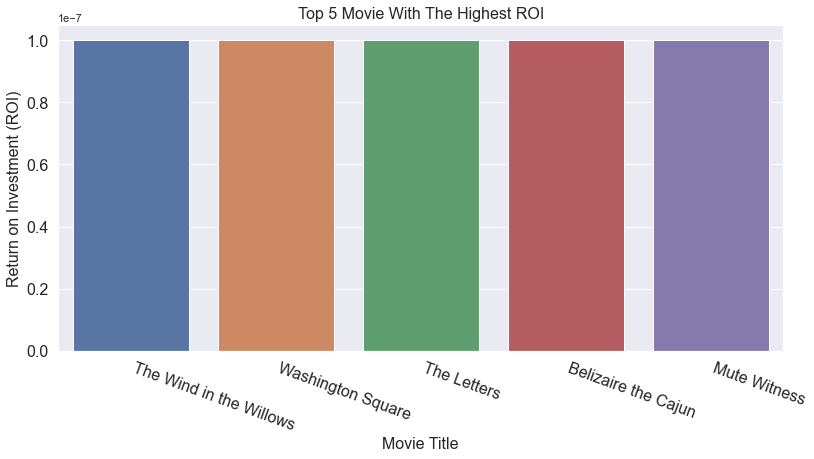

In [186]:
# Top 5 least profitable movies
cols = ['title', 'ROI']

revenue_df = train.sort_values('ROI', ascending = True)[cols].set_index('title')

# Create top 5 movies subsets
bottom_5 = revenue_df.head(5)

# Plot the visuals 
sns.barplot(data = bottom_5, x = bottom_5.index, y = 'ROI');
plt.xticks(ha = 'left', rotation = -20, fontsize = 16); plt.yticks(fontsize = 16)
plt.title('Top 5 Movie With The Highest ROI', fontsize = 16)
# plt.ylim(-0.50_000_000,0)
plt.ylabel('Return on Investment (ROI)', size = 16)
plt.xlabel('Movie Title', size = 16)
plt.show()

In [187]:
# Return on investments for top performing movies

the_wind_in_the_willows = train[train.title == 'The Wind in the Willows']
washington_sqaure = train[train.title == 'Washington Square']
the_letters = train[train.title == 'The Letters']
belizaire_the_cajun = train[train.title == 'Belizaire the Cajun']
mute_witness = train[train.title == 'Mute Witness']

print('--------Return on Investment (Least Performing Movies)---------\n')
print(f'The Wind in the Willows: {the_wind_in_the_willows.ROI}\n---------')
print(f': Washington Square: {washington_sqaure.ROI}\n---------')
print(f'The Letters: {the_letters.ROI}\n---------')
print(f'Belizaire the Cajun Dundee: {belizaire_the_cajun.ROI}\n---------')
print(f'Mute Witness: {mute_witness.ROI}')
print('-----------------------')

None

--------Return on Investment (Least Performing Movies)---------

The Wind in the Willows: id
47168    1.000000e-07
Name: ROI, dtype: float64
---------
: Washington Square: id
45019    1.000000e-07
Name: ROI, dtype: float64
---------
The Letters: id
218275    1.000000e-07
Name: ROI, dtype: float64
---------
Belizaire the Cajun Dundee: id
274253    1.000000e-07
Name: ROI, dtype: float64
---------
Mute Witness: id
48787    1.000000e-07
Name: ROI, dtype: float64
-----------------------


In [146]:
# TOP ROI
revenue_df = train.sort_values('ROI', ascending = False)[cols].set_index('title')
revenue_df.head()

,ROI
title,
Lost in Thailand,94.545455
The Full Monty,73.671463
Jaws,67.236286
Crocodile Dundee,65.640701
Insidious,64.672767


In [149]:
# LEAST ROI
revenue_df = train.sort_values('ROI', ascending = True)[cols].set_index('title')
revenue_df.head()

,ROI
title,
The Wind in the Willows,1.000000e-07
Washington Square,1.000000e-07
The Letters,1.000000e-07
Belizaire the Cajun,1.000000e-07
Mute Witness,1.000000e-07


### 5. Which top 5 genres have the highest return on investment (ROI)?

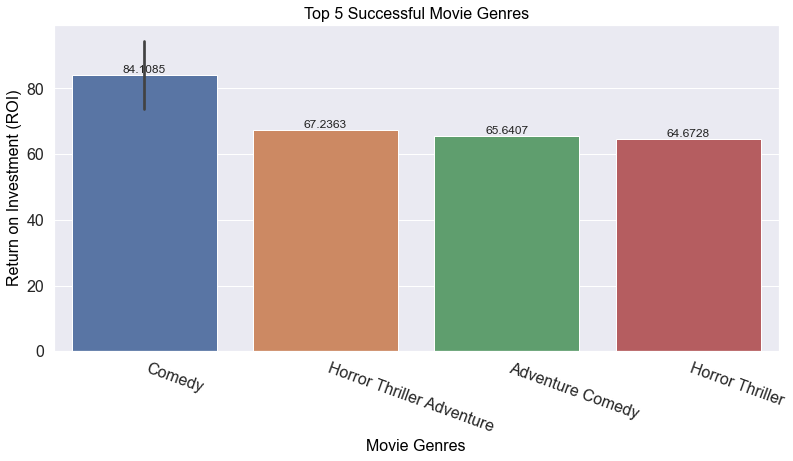

In [139]:
# Create top 5 most profitable subset
top_5_most_profitable_movies = train.nlargest(n = 5, columns = ['ROI'])

plt.title('Top 5 Successful Movie Genres', c = 'black', size = 16)

ax = sns.barplot(x = 'genres',  y = 'ROI', data = top_5_most_profitable_movies)

ax.bar_label(ax.containers[0])  
# overall_movie_profit_mean = df.ROI.mean()
plt.xticks(ha = 'left', rotation = -20, fontsize = 16); plt.yticks(fontsize = 16)
# lib.plt.axhline(overall_movie_profit_mean, label="Overall Average ROI", color = 'g')
plt.ylabel('Return on Investment (ROI)', c = 'black', size = 16)
plt.xlabel('Movie Genres', c = 'black', size = 16)
# lib.plt.legend()
plt.show()

__Interpretation:__ Comedy appears to have highest profit. 

    - Why comedy and not action movies as previuosly discovered?

### 6. Which  5 genres have the least return on investment(ROI)?

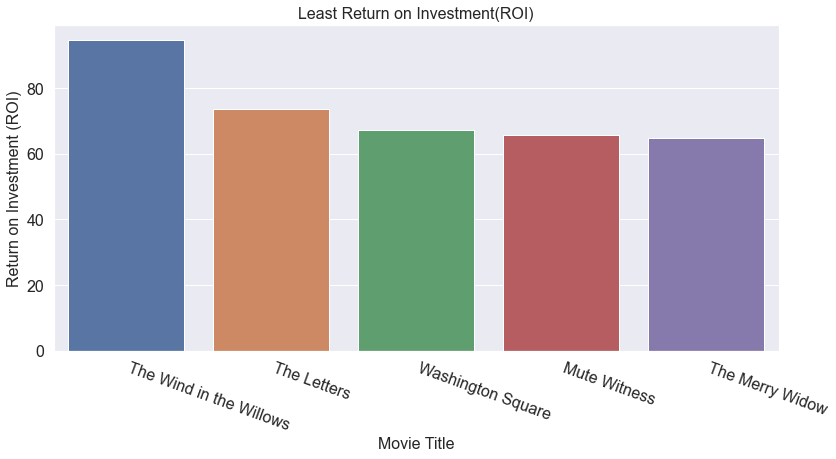

In [58]:
# Bottom 5 least profitable movies
cols = ['title', 'ROI']
movie_ratings_df = train.sort_values('ROI', ascending = False)[cols].set_index('title')

# Create bottom 5 object
bottom_5 = movie_ratings_df.tail(5)

# Plot the visuals 
sns.barplot(data = top_5, 
                x = bottom_5.index, 
                y = 'ROI');

plt.xticks(ha = 'left', rotation = -20, fontsize = 16); plt.yticks(fontsize = 16)
plt.title('Least Return on Investment(ROI)', fontsize = 16)
plt.ylabel('Return on Investment (ROI)', size = 16)
plt.xlabel('Movie Title', size = 16)
plt.show()

__Interpretation:__ Least profitable movie is the `Belizaire the Cajun`.

### 7. Which are the least 5 genres have the lowest profit?

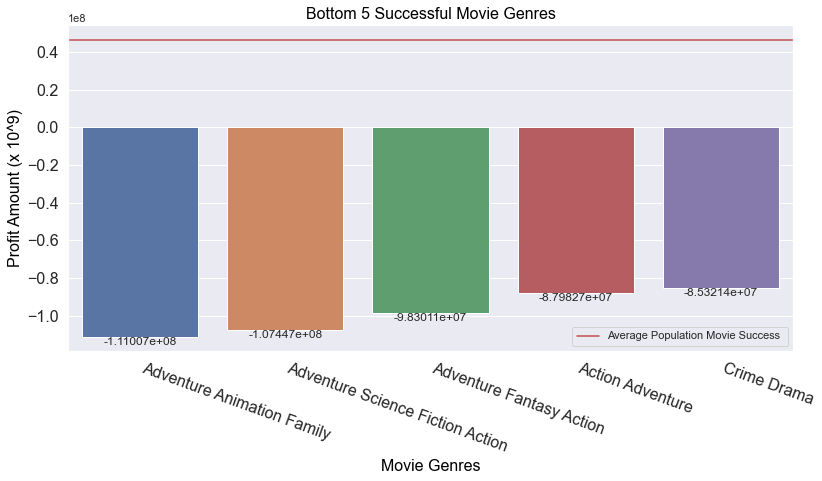

In [86]:
# Create top 5 most profitable subset
bottom_5_most_profitable_movies = train.nsmallest(n = 5, columns = ['profit_amount'])

plt.title('Bottom 5 Successful Movie Genres', c = 'black', size = 16)

ax = sns.barplot(x = 'genres',  y = 'profit_amount', data = bottom_5_most_profitable_movies)

ax.bar_label(ax.containers[0])  
overall_movie_profit_mean = df.profit_amount.mean()
plt.xticks(ha = 'left', rotation = -20, fontsize = 16); plt.yticks(fontsize = 16)
plt.axhline(overall_movie_profit_mean, label= 'Average Population Movie Success ', color = 'r')
plt.ylabel('Profit Amount (x 10^9)', c = 'black', size = 16)
plt.xlabel('Movie Genres', c = 'black', size = 16)

plt.legend()
plt.show()

__Interpretation:__ Movies genres grouped in genres (Regex split**)

### 8. Are there production studios that are more likely to succeed than others?


In [61]:
print(f'Number of unique production companies: {train.production_company.nunique()}')

Number of unique production companies: 1289


In [62]:
# Percentile success by production country

train.groupby(['production_countries']).success.quantile().sort_values(ascending = False)

production_countries
Italy Japan UnitedStatesofAmerica                                               1.0
China Germany UnitedKingdom UnitedStatesofAmerica                               1.0
Mexico SouthAfrica UnitedStatesofAmerica                                        1.0
CzechRepublic UnitedKingdom                                                     1.0
UnitedKingdom HongKong China                                                    1.0
Germany UnitedKingdom UnitedStatesofAmerica Belgium Denmark                     1.0
Malaysia India                                                                  1.0
UnitedKingdom Japan UnitedStatesofAmerica                                       1.0
China UnitedStatesofAmerica                                                     1.0
UnitedKingdom Luxembourg                                                        1.0
China Thailand                                                                  1.0
Greece UnitedStatesofAmerica                           

In [63]:
us_production_companies = train[train.production_countries == 'UnitedStatesofAmerica']

us_production_companies.groupby('production_countries').success.mean()

production_countries
UnitedStatesofAmerica    0.418855
Name: success, dtype: float64

__Interpretation:__ 
- There are 1316 unique production companies
- Production countries needs a little more data prepation....... (Break by specific country)

### 9. What are the drivers for less successive movies categories?


In [64]:
# Get least successive movie subset

cols = ['vote_average','profit_amount',
        'vote_count','total_n_cast',
        'budget','revenue','popularity',
        'runtime','profitable',
        'release_year','is_genre_adventure',
        'is_genre_horror','is_genre_drama',
        'is_genre_scifi','is_genre_romance',
        'is_genre_thriller','is_genre_crime',
        'is_genre_comedy','is_genre_animation',
        'is_genre_action','is_genre_mystery',
        'is_genre_fantasy','is_genre_documentary',
        'release_month','release_day',
        'is_long_movie','ROI']

X_train = train[cols]
Y_train = train.success

X_validate = validate[cols]
Y_validate = validate.success

X_validate = test[cols]
Y_validate = test.success

> #### Using SelectKBest to find drivers for success

In [65]:
from sklearn.feature_selection import SelectKBest, f_regression, RFE, SequentialFeatureSelector

## SelectKBest lib' already imported above. continuing....

f_selector = SelectKBest(f_regression, k = 8)

f_selector.fit(X_train, Y_train)

feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()
print(f'Key drivers for successful movies:\n\n {f_feature}')

Key drivers for successful movies:

 ['vote_average', 'profit_amount', 'vote_count', 'total_n_cast', 'revenue', 'popularity', 'profitable', 'ROI']


In [66]:
f_selector_results = pd.DataFrame(dict(p = f_selector.pvalues_, 
                                  f = f_selector.scores_), 
                             index = X_train.columns)
f_selector_results

,p,f
vote_average,1.357922e-60,279.330973
profit_amount,1.391916e-227,1190.412240
vote_count,1.791956e-140,692.315100
total_n_cast,3.412971e-39,175.434516
budget,8.353404e-19,79.227664
revenue,1.068155e-180,915.862716
popularity,1.012595e-48,221.338034
runtime,3.734624e-25,108.870573
profitable,0.000000e+00,24001.806101
release_year,5.825772e-08,29.536877


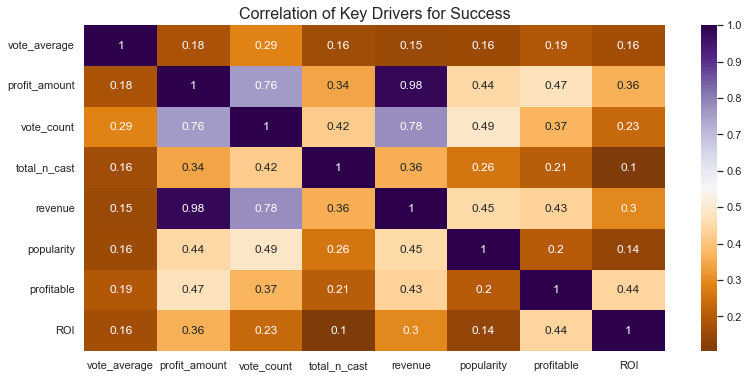

In [67]:
top_drivers = ['vote_average', 'profit_amount', 
               'vote_count', 'total_n_cast', 
               'revenue', 'popularity', 
               'profitable', 'ROI']

corr_matrix = df[top_drivers].corr()
 
# Plots
sns.heatmap(corr_matrix, cmap='PuOr', annot = True)
plt.title('Correlation of Key Drivers for Success', size = 16)
plt.show()

__Interpretations:__ Features with highest drive for success are:

- Vote Average
- Profit Amount
- Vote Count
- Total in Cast
- Revenue
- Popularity
- Profitable
- Return on Investment(ROI)


### 10. Are long movies (runtime > 120 min) likely to have more success than short movies 

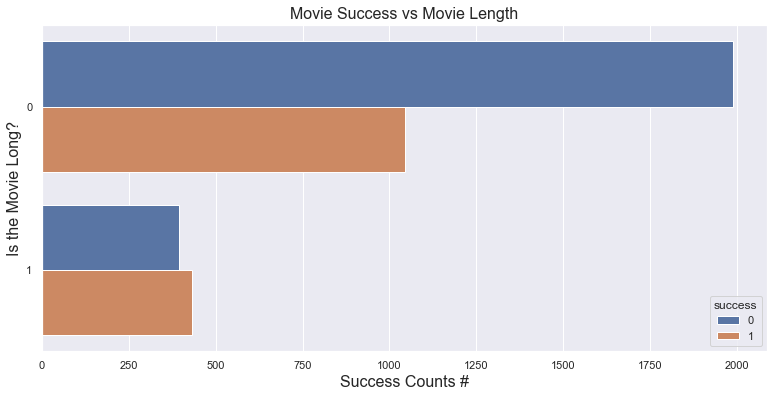

In [68]:
# Movie success by runtime 

sns.countplot(data = train, y = 'is_long_movie', hue = 'success')
plt.title('Movie Success vs Movie Length', size = 16)
plt.xlabel('Success Counts #', size = 16)
plt.ylabel('Is the Movie Long?', size = 16)
plt.show()

__Interpretation:__ Longer movies tend to have more success than shorter movies

> ## (c). Multi-variate exploration

### 7. Is there a correlations between runtime for successful movies vs unsuccessful movies


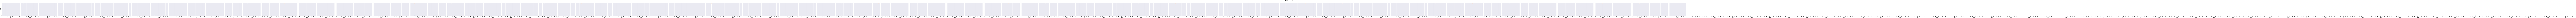

In [69]:
# No discernable relationship between age and fare, but the pclass relates to survival
rel = sns.relplot(x='runtime', y='success', data=train, col="runtime", hue="success")
rel.fig.suptitle('Age to Fare, colum by pclass') # One way to title a relplot
plt.tight_layout()

> ## Time Series Analysis on the movies dataset

### 9. Which release years, months, days are movies likely to be successful?


##### (i). Release Year Movie Success 

In [70]:
# Copy df for time series analysis

train_ts_df = train.copy()

# Set release_date as index
train_ts_df = train_ts_df.set_index('release_date').sort_index()

In [71]:
# Examine new dataset format

train_ts_df.head(2)

,title,success,success_rating,genres,cast_actor_1,cast_actor_2,cast_actor_3,total_n_cast,budget,revenue,profit_amount,vote_average,vote_count,production_companies,production_countries,overview,popularity,runtime,profitable,imdb_id,production_company,is_genre_adventure,is_genre_horror,is_genre_drama,is_genre_scifi,is_genre_romance,is_genre_thriller,is_genre_crime,is_genre_comedy,is_genre_animation,is_genre_action,is_genre_mystery,is_genre_fantasy,is_genre_documentary,release_year,release_month,release_day,release_weekday,is_long_movie,ROI,returns,budget_range
release_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1915-02-08,The Birth of a Nation,0,3.52,Drama History War,Lillian Gish,Mae Marsh,Henry B. Walthall,49.0,10000000.0,11000000.0,1000000.0,6.4,109.0,EpochFilmCo.,UnitedStatesofAmerica,The Birth of A Nation...,5.113205,193.0,0,tt0004972,EpochFilmCo.,0,0,1,0,0,0,0,0,0,0,0,0,0,1915,2,8,Monday,1,1.1,avg,low
1918-08-01,Mickey,0,3.00,Comedy Drama,Mabel Normand,George Nichols,Wheeler Oakman,8.0,10000000.0,8000000.0,-2000000.0,7.5,4.0,MabelNormandFeatureFi...,UnitedStatesofAmerica,"Mickey, an orphan who...",0.211008,93.0,0,tt0009369,MabelNormandFeatureFi...,0,0,1,0,0,0,0,1,0,0,0,0,0,1918,8,1,Thursday,0,0.8,avg,low


In [72]:
# Set target variable
y_target = train_ts_df.success

# Create subset of year 
released_after_2000 = train_ts_df[train_ts_df.release_year >= 2000]
released_between_1980_2000 = train_ts_df[(train_ts_df.release_year >= 1980) & (train_ts_df.release_year < 2000)]
released_before_1980 = train_ts_df[train_ts_df.release_year < 1980]

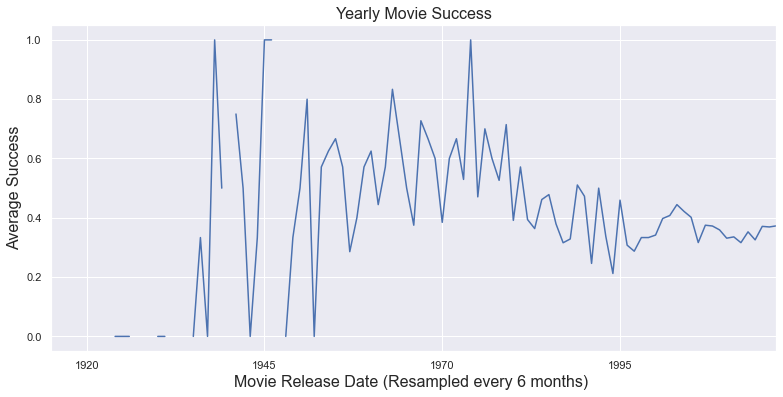

In [73]:
# Success resmapled ever 3 years  for movie set

y_target.resample('Y').mean().plot()
plt.title('Yearly Movie Success', size = 16)
plt.ylabel('Average Success', size = 16)
plt.xlabel('Movie Release Date (Resampled every 6 months) ', size = 16)
plt.show()

##### (ii). Release Month Movie Success

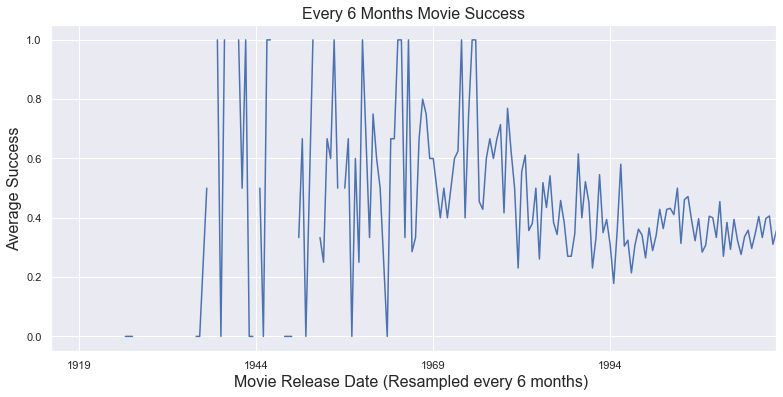

In [74]:
# Success resmapled ever 3 years  for movie set

y_target.resample('6M').mean().plot()
plt.title('Every 6 Months Movie Success', size = 16)
plt.ylabel('Average Success', size = 16)
plt.xlabel('Movie Release Date (Resampled every 6 months) ', size = 16)
plt.show()

##### (ii). Release Days Movie Success

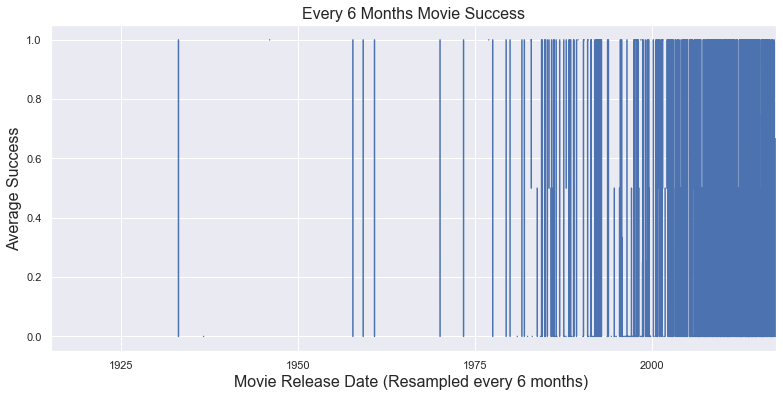

In [75]:
# Success resmapled ever 3 years  for movie set

y_target.resample('D').mean().plot()
plt.title('Every 6 Months Movie Success', size = 16)
plt.ylabel('Average Success', size = 16)
plt.xlabel('Movie Release Date (Resampled every 6 months) ', size = 16)
plt.show()

### 12. What movies are long and successful?

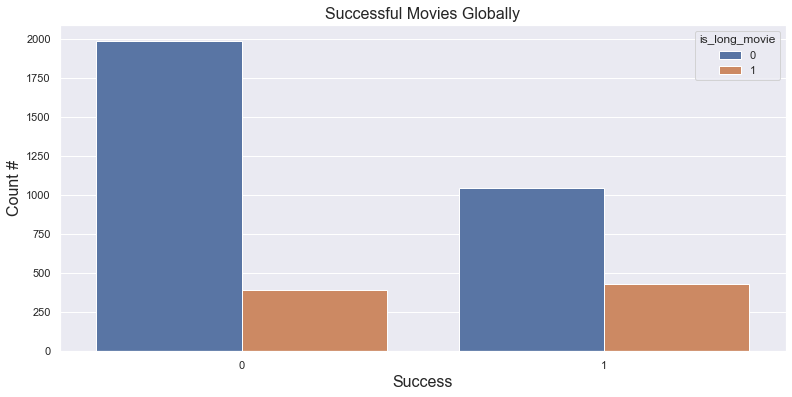

In [76]:
# Movies that are long  

sns.countplot(x='success', hue='is_long_movie',
                data = train);
plt.title('Successful Movies Globally', size = 16)
plt.ylabel('Count #', size = 16)
plt.xlabel('Success', size = 16)
plt.show()

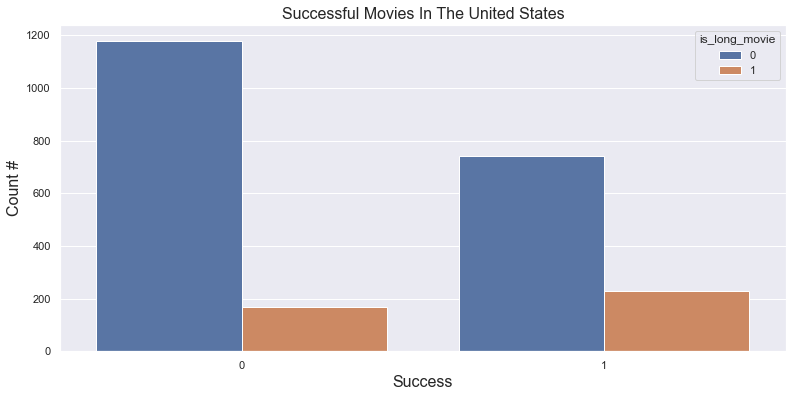

In [77]:
# Create united states movies subset 
us_movies = train[train.production_countries == 'UnitedStatesofAmerica']

# United Movies 
sns.countplot(x='success', hue='is_long_movie',data = us_movies);
plt.title('Successful Movies In The United States', size = 16)
plt.ylabel('Count #', size = 16)
plt.xlabel('Success', size = 16)
plt.show()

__Interpretation:__ Similar pattern for successful vs unsuccessful movies within America as compared globally

### Exploration Key Takeaways

- Overall movie success baseline is `38.9%`
- Lower budget movies will more often have higher return on investement
- Very high budget movies are more stable investment and almost guaranteee return on investement 
- Longer movies tend to have more success proportionally than shorter movies
- Lower budget has no huge effect on profit, however as the budget increases profit increases. A spike in the success could be investigated further
- Highly rated movie is the `Alice in the Wonderland`. This is received almost twice the ratings amount than the fifth movie
- Overall, least rated movie is the "Teddy Bear's Picnic"
- `Alice in the Wonderland` is the most successful movie in this exploration. Follow up questions:
 - Why is `Alice in the Wonderland` more successful than all the other movies? 
 - What genres are these successful movies in?
- Least profitable movie is the `Belizaire the Cajun`.

- `38.9%` of movies in the dataset succeeded and `61.1%` less likely to succeed
- Vote average and runtime appears normally distributed



- successful movies characteristics
    - 
    - 

- less successful movies characteristics
    -
    -
    -


In [78]:
# Create success subset
success_movies = train[train.success == 1]

# Get respective distribution 
success_movies.is_genre_adventure.value_counts()

0    1190
1     286
Name: is_genre_adventure, dtype: int64

## Modeling

In [79]:
# Get modeling data
modeling_df = create_modeling_df()

Using cached CSV
the shape of this modeling df should be (6893, 46)
the current shape is (6893, 46)
please split and then scale this dataframe


In [80]:
# Create x & y train, validate and test sets
X_train, X_validate, X_test,\
y_train, y_validate, y_test = split_and_scale(modeling_df)

In [81]:
print('X_train:', X_train.shape)
print('X_validate:', X_validate.shape)
print('X_test:', X_test.shape)

X_train: (3859, 46)
X_validate: (1655, 46)
X_test: (1379, 46)


## Feature Selection
Trying a new approach to feature selection using one of Scikitlearn's transformers. 
This Sequential Feature Selector adds (forward selection) or removes (backward selection) features to form a feature subset in a greedy fashion. At each stage, this estimator chooses the best feature to add or remove based on the cross-validation score of an estimator. The following features were selected through this process, in three separate iterations. 

In [82]:
# Create precision features
precision_features = ['production_company_Metro-Goldwyn-Mayer(MGM)','production_company_other_company',
                      'cast_actor_1_Tom Cruise', 'cast_actor_1_Robert De Niro','vote_count',
                      'is_genre_scifi','production_company_NewLineCinema', 'budget',
                      'is_genre_thriller', 'cast_actor_1_Nicolas Cage']

# Create precision rows for train, validate, and test
X_train = X_train.loc[:, precision_features]
X_validate = X_validate.loc[:, precision_features]
X_test = X_test.loc[:, precision_features]


 -----------------------------------------
Logistic Regression Precision
Best Score = 0.8327
Best Hyper-parameters = {'C': 10, 'solver': 'newton-cg'}

Test Scores:
0.8063 (+/-0.022) for {'C': 1, 'solver': 'newton-cg'}
0.8063 (+/-0.022) for {'C': 1, 'solver': 'lbfgs'}
0.8065 (+/-0.022) for {'C': 1, 'solver': 'sag'}
0.8063 (+/-0.022) for {'C': 1, 'solver': 'saga'}
0.8327 (+/-0.021) for {'C': 10, 'solver': 'newton-cg'}
0.8327 (+/-0.021) for {'C': 10, 'solver': 'lbfgs'}
0.8325 (+/-0.021) for {'C': 10, 'solver': 'sag'}
0.8325 (+/-0.021) for {'C': 10, 'solver': 'saga'}
0.8113 (+/-0.013) for {'C': 100, 'solver': 'newton-cg'}
0.8113 (+/-0.013) for {'C': 100, 'solver': 'lbfgs'}
0.8113 (+/-0.013) for {'C': 100, 'solver': 'sag'}
0.8113 (+/-0.013) for {'C': 100, 'solver': 'saga'}
0.8078 (+/-0.012) for {'C': 1000, 'solver': 'newton-cg'}
0.8078 (+/-0.012) for {'C': 1000, 'solver': 'lbfgs'}
0.8078 (+/-0.012) for {'C': 1000, 'solver': 'sag'}
0.8078 (+/-0.012) for {'C': 1000, 'solver': 'saga'}

Traini

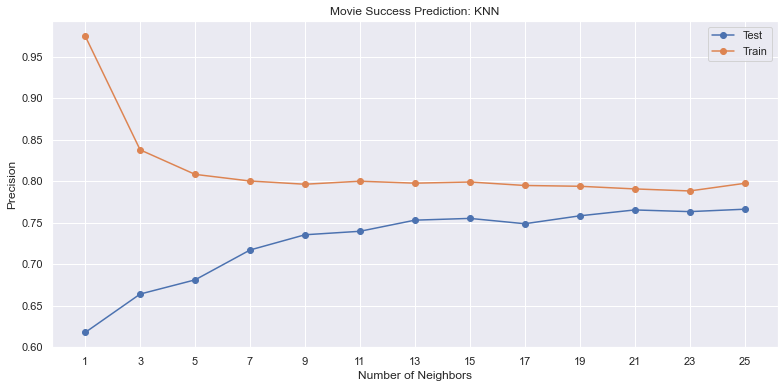

------------------------------------------------

 -----------------------------------------
Decision Tree Regression Precision
Best Score = 0.7652
Best Hyper-parameters = {'max_depth': 6}

Test Scores:
0.7342 (+/-0.066) for {'max_depth': 1}
0.7342 (+/-0.066) for {'max_depth': 2}
0.7546 (+/-0.046) for {'max_depth': 3}
0.7388 (+/-0.031) for {'max_depth': 4}
0.7391 (+/-0.014) for {'max_depth': 5}
0.7652 (+/-0.022) for {'max_depth': 6}
0.7462 (+/-0.033) for {'max_depth': 7}
0.7423 (+/-0.031) for {'max_depth': 8}
0.7312 (+/-0.010) for {'max_depth': 9}
0.6964 (+/-0.023) for {'max_depth': 10}
0.6744 (+/-0.023) for {'max_depth': 11}
0.6739 (+/-0.029) for {'max_depth': 12}
0.6433 (+/-0.017) for {'max_depth': 13}
0.6495 (+/-0.014) for {'max_depth': 14}
0.6540 (+/-0.017) for {'max_depth': 15}
0.6326 (+/-0.017) for {'max_depth': 16}

Training Scores:
0.7571 (+/-0.050) for {'max_depth': 1}
0.7571 (+/-0.050) for {'max_depth': 2}
0.7747 (+/-0.030) for {'max_depth': 3}
0.7709 (+/-0.028) for {'max_dep

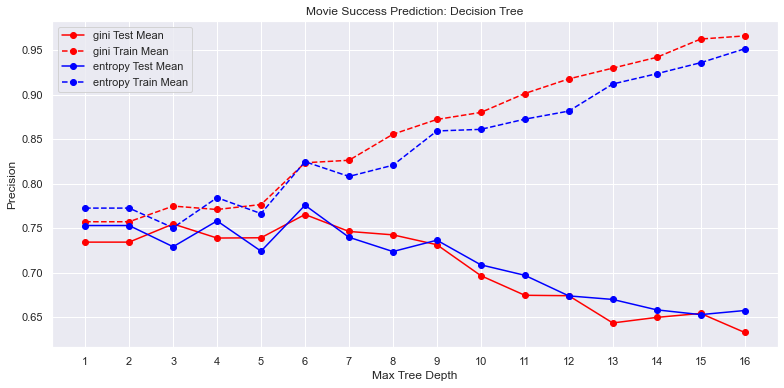

------------------------------------------------
------------------------------------------------


In [83]:
# Precision models

precision_models(X_train, y_train)


 -----------------------------------------
Logistic Regression Precision
Best Score = 0.8093
Best Hyper-parameters = {'C': 10, 'solver': 'newton-cg'}

Test Scores:
0.7684 (+/-0.037) for {'C': 1, 'solver': 'newton-cg'}
0.7684 (+/-0.037) for {'C': 1, 'solver': 'lbfgs'}
0.7684 (+/-0.037) for {'C': 1, 'solver': 'sag'}
0.7684 (+/-0.037) for {'C': 1, 'solver': 'saga'}
0.8093 (+/-0.009) for {'C': 10, 'solver': 'newton-cg'}
0.8093 (+/-0.009) for {'C': 10, 'solver': 'lbfgs'}
0.8093 (+/-0.009) for {'C': 10, 'solver': 'sag'}
0.8093 (+/-0.009) for {'C': 10, 'solver': 'saga'}
0.8052 (+/-0.024) for {'C': 100, 'solver': 'newton-cg'}
0.8052 (+/-0.024) for {'C': 100, 'solver': 'lbfgs'}
0.8052 (+/-0.024) for {'C': 100, 'solver': 'sag'}
0.8047 (+/-0.024) for {'C': 100, 'solver': 'saga'}
0.8013 (+/-0.027) for {'C': 1000, 'solver': 'newton-cg'}
0.8013 (+/-0.027) for {'C': 1000, 'solver': 'lbfgs'}
0.8013 (+/-0.027) for {'C': 1000, 'solver': 'sag'}
0.8013 (+/-0.027) for {'C': 1000, 'solver': 'saga'}

Traini

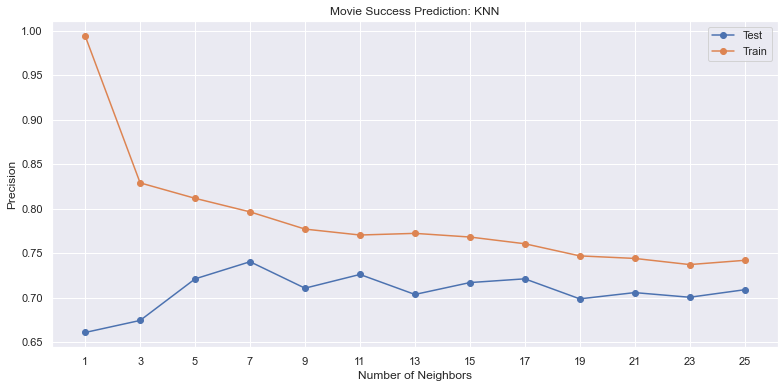

------------------------------------------------

 -----------------------------------------
Decision Tree Regression Precision
Best Score = 0.7170
Best Hyper-parameters = {'max_depth': 3}

Test Scores:
0.6459 (+/-0.038) for {'max_depth': 1}
0.6865 (+/-0.053) for {'max_depth': 2}
0.7170 (+/-0.039) for {'max_depth': 3}
0.7080 (+/-0.030) for {'max_depth': 4}
0.7074 (+/-0.040) for {'max_depth': 5}
0.6957 (+/-0.027) for {'max_depth': 6}
0.6898 (+/-0.045) for {'max_depth': 7}
0.6647 (+/-0.044) for {'max_depth': 8}
0.6579 (+/-0.029) for {'max_depth': 9}
0.6637 (+/-0.024) for {'max_depth': 10}
0.6424 (+/-0.012) for {'max_depth': 11}
0.6426 (+/-0.011) for {'max_depth': 12}
0.6210 (+/-0.014) for {'max_depth': 13}
0.6211 (+/-0.014) for {'max_depth': 14}
0.6273 (+/-0.014) for {'max_depth': 15}
0.6171 (+/-0.016) for {'max_depth': 16}

Training Scores:
0.6587 (+/-0.021) for {'max_depth': 1}
0.7073 (+/-0.079) for {'max_depth': 2}
0.7586 (+/-0.054) for {'max_depth': 3}
0.7532 (+/-0.042) for {'max_dep

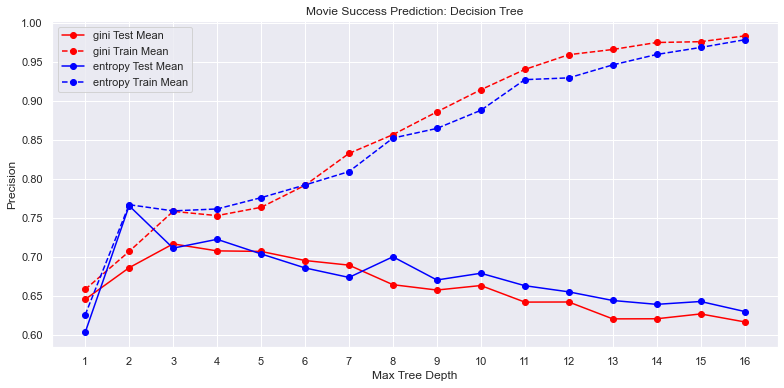

------------------------------------------------
------------------------------------------------


In [84]:
# Equally stellar results on validate. Unhash to expand.
precision_models(X_validate, y_validate)

------------------
Number of records:  1379
------------------
Confusion Matrix:
[['tn: 758' 'fp: 79']
 ['fn: 272' 'tp: 270']]
------------------
Accuracy: 74.546773024 %
------------------
TPR: 49.8155 %
TNR: 90.5615 %
FPR: 9.4385 %
FNR: 50.1845 %
------------------
Precision: 0.7736
Recall: 0.4982
------------------
F1-Measure: 0.6061


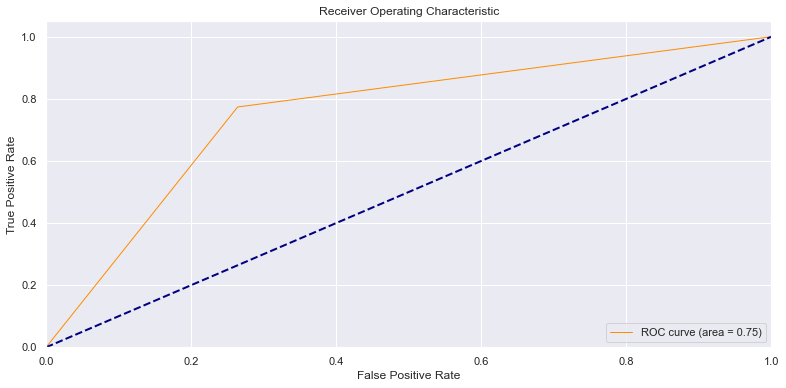

In [85]:
# Predicting best model on test set
predict_on_test(X_train, y_train, X_test, y_test)

## Exploration Summarized Results

We choose to use precision as out metric because `the cost of mis-labeling a negative movie classifier as positive is costly` than otherwise.

> ### (a). Modeling on X_train set

<style>
    table {
        display: inline-block
    }
</style>

| Model  | Acuracy | Precison | Recall |
| :------ | :------ | :------ | |
| Baseline  | 0.6209 |  0.6209 |0.6209 |
| Decision Tree  | 0.7631  | 0.7644  | 0.5929 |
| Logistic Regression  | 07784 | 0.8327  | 0.5630 |
| K-Nearest Neighbor  | 07595  | 0.7662  | 0.5936 |


> ### (b). Modeling on X_validate set

<style>
    table {
        display: inline-block
    }
</style>

| Model  | Acuracy | Precison | Recall |
| :------ | :------ | :------ | |
| Baseline  | 0.6209 |  0.6209 |0.6209 |
| Decision Tree  | 0.7601  | 0.7170  | 0.6703 |
| Logistic Regression  | 0.7589 | 0.8093  | 0.4952 |
| K-Nearest Neighbor  | 07674  | 0.7405  | 0.6325|


> ### (b). Modeling on X_validate set

<style>
    table {
        display: inline-block
    }
</style>

| Model  | Acuracy | Precison | Recall |
| :------ | :------ | :------ | |
| Baseline  | 0.6209 |  0.6209 |0.6209 |
| Logistic Regression   | 0.7454  | 0.7736  | 0.4982|

### Best model Logistic regression

## Future Exploration

- Compare movie success by continents 
- Time series analysis for successful movies:
    - Is there a relationship of profit amount with release month and day of the week?


